# Regression and Other Stories: Elections Economy
Linear regression with multiple predictors. See Chapters 10, 11 and 12 in Regression and Other Stories.

In [1]:
import arviz as az
from bambi import Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [20]:
kidiq = pd.read_csv("kidiq.csv")
kidiq.head()

,Unnamed: 0,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,1,65,1,121.117529,4,27
1,2,98,1,89.361882,4,25
2,3,85,1,115.443165,4,27
3,4,83,1,99.449639,3,25
4,5,115,1,92.745710,4,27


### A single binary predictor

In [3]:
model = Model(kidiq)
M1 = model.fit('kid_score ~ mom_hs', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [kid_score_sd, mom_hs, Intercept]
INFO:pymc3:NUTS: [kid_score_sd, mom_hs, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
The number of effective samples is smaller than 25% for some parameters.
INFO:pymc3:The number of effective samples is smaller than 25% for some parameters.
/opt/conda/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [4]:
func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(M1, stat_funcs=func_dict, extend=False, round_to=2)
coefs

,Median,MAD_SD
Intercept[0],77.58,1.40
mom_hs[0],11.66,1.53
kid_score_sd,19.70,0.37


### A single continuous predictor

In [8]:
model = Model(kidiq)
M2 = model.fit('kid_score ~ mom_iq', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [kid_score_sd, mom_iq, Intercept]
INFO:pymc3:NUTS: [kid_score_sd, mom_iq, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.
/opt/conda/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [9]:
func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(M2, stat_funcs=func_dict, extend=False, round_to=2)
coefs

,Median,MAD_SD
Intercept[0],25.80,4.18
mom_iq[0],0.61,0.04
kid_score_sd,18.32,0.43


### Displaying a regression line as a function of one input variable

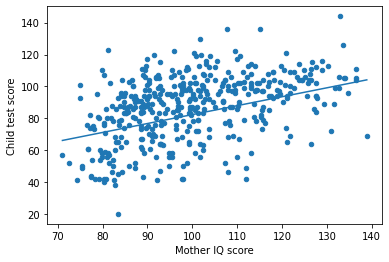

In [14]:
# TODO: Change the plot from points to years
fig, ax = plt.subplots()

a_hat = coefs.loc["Intercept[0]", "Median"]
b_hat = coefs.loc["mom_iq[0]", "Median"]

# Generate x range
iq_domain = np.linspace(kidiq["mom_iq"].min(), kidiq["mom_iq"].max(), 100)

# Plot Line
ax.plot(iq_domain, a_hat+b_hat*iq_domain)


# Add scatter plot
kidiq.plot(kind="scatter", x="mom_iq", y="kid_score", ax=ax)
ax.set_xlabel("Mother IQ score")
ax.set_ylabel("Child test score");

## Two predictors
### Linear Regressiob

In [38]:
model = Model(kidiq)
M3 = model.fit('kid_score ~ mom_hs + mom_iq', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [kid_score_sd, mom_iq, mom_hs, Intercept]
INFO:pymc3:NUTS: [kid_score_sd, mom_iq, mom_hs, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 8 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 8 seconds.
/opt/conda/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [46]:
func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(M3, stat_funcs=func_dict, extend=False, round_to=2)
coefs

,Median,MAD_SD
Intercept[0],25.98,4.03
mom_hs[0],5.95,1.52
mom_iq[0],0.56,0.04
kid_score_sd,18.20,0.45


## Graphical displays of data and fitted models

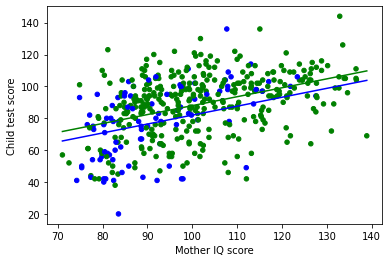

In [47]:
# TODO: Change the plot from points to years
fig, ax = plt.subplots()


# Generate x range
iq_domain = np.linspace(kidiq["mom_iq"].min(), kidiq["mom_iq"].max(), 100)

# # Plot No HS Line
ax.plot(iq_domain, coefs.loc["Intercept[0]", "Median"]+coefs.loc["mom_iq[0]", "Median"]*iq_domain, c="b")
ax.plot(iq_domain, coefs.loc["Intercept[0]", "Median"] + coefs.loc["mom_iq[0]", "Median"]*iq_domain + coefs.loc["mom_hs[0]", "Median"], c="g" )


# Add scatter plot
kidiq.plot(kind="scatter", x="mom_iq", y="kid_score", c=kidiq["mom_hs"].replace({0: "B", 1:"G"}), ax=ax)
ax.set_xlabel("Mother IQ score")
ax.set_ylabel("Child test score");

### Two fitted regression lines – model with interaction

In [42]:
model = Model(kidiq)
M4 = model.fit('kid_score ~ mom_hs + mom_iq + mom_hs*mom_iq', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [kid_score_sd, mom_hs:mom_iq, mom_iq, mom_hs, Intercept]
INFO:pymc3:NUTS: [kid_score_sd, mom_hs:mom_iq, mom_iq, mom_hs, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 20 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 20 seconds.
The acceptance probability does not match the target. It is 0.8809113752654851, but should be close to 0.8. Try to increase the number of tuning steps.
There were 209 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 209 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6632402453801266, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
/opt/conda/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model

In [51]:
func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(M4, stat_funcs=func_dict, extend=False, round_to=2)
coefs

,Median,MAD_SD
Intercept[0],-11.03,8.45
mom_hs[0],50.01,9.28
mom_iq[0],0.96,0.09
mom_hs:mom_iq[0],-0.47,0.10
kid_score_sd,18.02,0.45


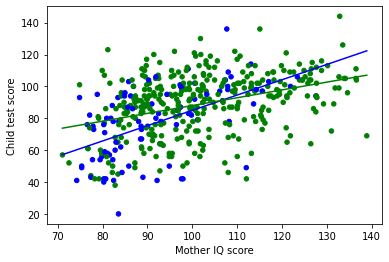

In [53]:
# TODO: Change the plot from points to years
fig, ax = plt.subplots()


# Generate x range
iq_domain = np.linspace(kidiq["mom_iq"].min(), kidiq["mom_iq"].max(), 100)


# # Plot No HS Line
ax.plot(iq_domain, coefs.loc["Intercept[0]", "Median"]+coefs.loc["mom_iq[0]", "Median"]*iq_domain, c="b")
ax.plot(iq_domain, coefs.loc["Intercept[0]", "Median"] +
        coefs.loc["mom_iq[0]", "Median"]*iq_domain + 
        coefs.loc["mom_hs[0]", "Median"] +
        coefs.loc["mom_hs:mom_iq[0]", "Median"]*iq_domain,
        c="g" )


# Add scatter plot
kidiq.plot(kind="scatter", x="mom_iq", y="kid_score", c=kidiq["mom_hs"].replace({0: "B", 1:"G"}), ax=ax)
ax.set_xlabel("Mother IQ score")
ax.set_ylabel("Child test score");

### Displayijg uncertainty in the fitted regression
#### A single continuous predictor

In [ ]:
# TODO: All below